In [ ]:
!mamba install -y gseapy 

## gene-set enrichment analysis is java program for enricher, rust mode on python
## https://gseapy.readthedocs.io/en/latest/introduction.html

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gseapy as gp

In [86]:
degres = pd.read_csv('datasets/cutleish-deseq2.tsv',sep='\t',index_col=0)
degres.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003|TSPAN6|776,644.288558,-0.765788,0.175089,-4.373697,1.221599e-05,6.274097e-05
ENSG00000000005|TNMD|956,159.710798,-5.687670,0.456221,-12.466905,1.131349e-35,7.083891e-34
ENSG00000000419|DPM1|912,1296.374962,0.186928,0.175445,1.065452,2.866713e-01,4.239209e-01
ENSG00000000457|SCYL3|6059,988.661520,0.132975,0.188855,0.704114,4.813620e-01,6.217079e-01
ENSG00000000460|C1orf112|676,333.909073,0.390114,0.280293,1.391807,1.639809e-01,2.757349e-01


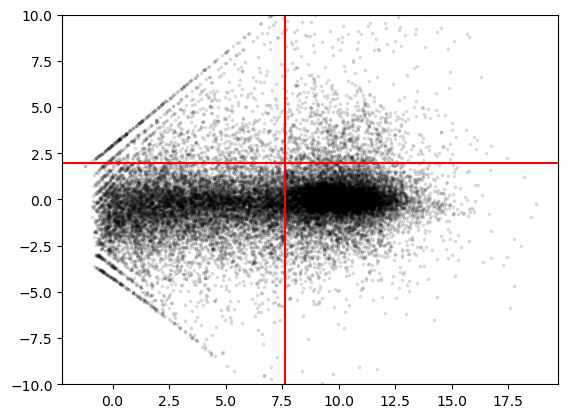

In [13]:
plt.scatter(
    np.log2(degres['baseMean']),
    degres['log2FoldChange'],
    c='black', s=3, alpha=.1)
plt.ylim(-10,10)
plt.axhline(2,c='red')
plt.axvline(np.log2(200),c='red')

In [15]:
HIGHEXPR_THRESHOLD = 200
UPREG_THRESHOLD = 2

highexpr = degres[degres['baseMean']> HIGHEXPR_THRESHOLD].copy()
upreg = highexpr[highexpr['log2FoldChange']> UPREG_THRESHOLD].copy()

upreg.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000938|FGR|855,1318.101362,4.566750,0.361807,12.622053,1.596054e-36,1.056306e-34
ENSG00000002549|LAP3|638,13809.498287,3.324975,0.275476,12.069930,1.522631e-33,8.482184e-32
ENSG00000002933|TMEM176A|784,1206.861176,3.587925,0.311378,11.522750,1.013242e-30,4.707521e-29
ENSG00000004399|PLXND1|835,4642.099225,2.071518,0.237291,8.729880,2.549431e-18,5.222511e-17
ENSG00000004468|CD38|5371,2683.046556,5.669369,0.440219,12.878531,5.945620e-38,4.249746e-36


In [17]:
len(upreg)

1050

In [21]:
upreg.index

Index(['ENSG00000000938|FGR|855', 'ENSG00000002549|LAP3|638',
       'ENSG00000002933|TMEM176A|784', 'ENSG00000004399|PLXND1|835',
       'ENSG00000004468|CD38|5371', 'ENSG00000005844|ITGAL|7275',
       'ENSG00000006118|TMEM132A|75', 'ENSG00000007264|MATK|552',
       'ENSG00000007908|SELE|3626', 'ENSG00000008513|ST3GAL1|801',
       ...
       'ENSG00000277734|TRAC|729', 'ENSG00000278196|IGLV2-8|268',
       'ENSG00000278463|H2AC4|278', 'ENSG00000278588|H2BC10|233',
       'ENSG00000278857|IGKV1D-12|122', 'ENSG00000280411|IGHV1-69D|162',
       'ENSG00000281887|GIMAP1-GIMAP5|1899', 'ENSG00000284194|SCO2|819',
       'ENSG00000285283|ENSG00000285283|942',
       'ENSG00000285446|ENSG00000285446|931'],
      dtype='object', length=1050)

In [25]:
upreg_ids=upreg.index.to_series().str.split('|').str[0].tolist()
upreg_ids[:5]

['ENSG00000000938',
 'ENSG00000002549',
 'ENSG00000002933',
 'ENSG00000004399',
 'ENSG00000004468']

In [55]:
bm = gp.Biomart()
results = bm.query(dataset='hsapiens_gene_ensembl',
                 attributes=['ensembl_gene_id','external_gene_name'],
                 filters={'ensembl_gene_id':upreg_ids[:200]})
results.head()

,ensembl_gene_id,external_gene_name
0,ENSG00000000938,FGR
1,ENSG00000002549,LAP3
2,ENSG00000002933,TMEM176A
3,ENSG00000004399,PLXND1
4,ENSG00000004468,CD38


In [56]:
len(results)

200

In [89]:
QUERYSIZE=200
opts = dict(dataset='hsapiens_gene_ensembl',
                 attributes=['ensembl_gene_id','external_gene_name'])

res=[]

for i in range(0, len(upreg)+1, QUERYSIZE):
    converted = bm.query(filters={'ensembl_gene_id':upreg_ids[i:i+QUERYSIZE]}, **opts)
    res.append(converted)
    
results=pd.concat(res)
results.head()

,ensembl_gene_id,external_gene_name
0,ENSG00000000938,FGR
1,ENSG00000002549,LAP3
2,ENSG00000002933,TMEM176A
3,ENSG00000004399,PLXND1
4,ENSG00000004468,CD38


In [ ]:
## upper code is for query size 200, each 200, 400, 600 .... read and them concatination by pd.concat

In [90]:
len(results)

1049

In [91]:
upreg_genenames=results['external_gene_name'].dropna().drop_duplicates().tolist()

In [92]:
len(upreg_genenames)

1038

In [93]:
upreg_genenames[:5]

['FGR', 'LAP3', 'TMEM176A', 'PLXND1', 'CD38']

In [94]:
enr = gp.enrichr(gene_list=upreg_genenames,
                gene_sets=['KEGG_2016','KEGG_2013'],
                organism='Human',
                outdir='test/enrichr_kegg',
                cutoff=0.1
                )

In [ ]:
## KEGG is high quality but not much information for journal

In [95]:
enr.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2013,HSA04060 CYTOKINE CYTOKINE RECEPTOR INTERACTION,66/257,3.736263e-28,4.819779e-26,0,0,6.673163,421.438897,CD40;CXCL9;TNFRSF6B;CSF3R;FLT3;IL24;FASLG;CXCL...
1,KEGG_2013,HSA04640 HEMATOPOIETIC CELL LINEAGE,35/88,1.827349e-22,1.178640e-20,0,0,12.449726,623.158671,CSF1R;CSF3R;ITGAM;FLT3;CD3G;CD3E;CD3D;CSF2RA;A...
2,KEGG_2013,HSA04514 CELL ADHESION MOLECULES,41/134,4.814869e-21,2.070394e-19,0,0,8.343622,390.336160,CD86;CD274;CD40;ITGAM;SELPLG;CD80;SDC3;ITGB2;I...
3,KEGG_2013,HSA04940 TYPE I DIABETES MELLITUS,21/45,9.825285e-16,3.168654e-14,0,0,16.293756,563.053593,CD86;HLA-DRB5;CD80;PRF1;GZMB;FASLG;HLA-F;HLA-E...
4,KEGG_2013,HSA04650 NATURAL KILLER CELL MEDIATED CYTOTOXI...,34/132,3.652305e-15,9.422948e-14,0,0,6.518579,216.699837,ITGB2;PRF1;PIK3CD;FASLG;ITGAL;PIK3CG;ICAM1;PIK...
...,...,...,...,...,...,...,...,...,...,...
124,KEGG_2013,HSA04310 WNT SIGNALING PATHWAY,4/149,9.540126e-01,9.845410e-01,0,0,0.502021,0.023634,SFRP4;FZD2;RAC2;PLCB2
125,KEGG_2013,HSA04540 GAP JUNCTION,2/98,9.659813e-01,9.889809e-01,0,0,0.379384,0.013131,PLCB2;ADCY7
126,KEGG_2013,HSA00230 PURINE METABOLISM,3/145,9.825670e-01,9.980405e-01,0,0,0.384160,0.006756,PDE4B;ADCY7;ADA
127,KEGG_2013,HSA04530 TIGHT JUNCTION,2/136,9.941016e-01,9.989315e-01,0,0,0.271250,0.001605,HCLS1;PRKCQ


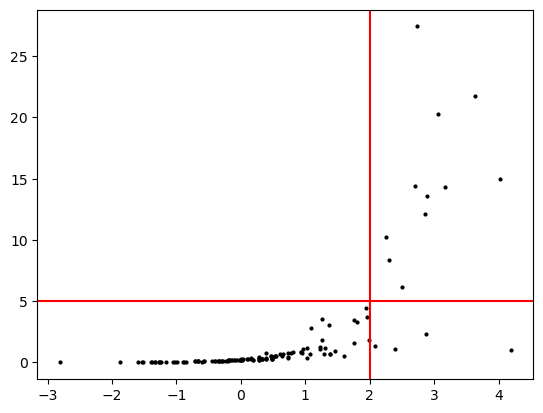

In [98]:
plt.scatter(np.log2(enr.res2d['Odds Ratio']),
            -np.log10(enr.res2d['P-value']),
            c='black',s=4)
plt.axhline(5,c='red')
plt.axvline(2,c='red')

In [99]:
enr.res2d.sort_values(by='Adjusted P-value').head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2013,HSA04060 CYTOKINE CYTOKINE RECEPTOR INTERACTION,66/257,3.736263e-28,4.819779e-26,0,0,6.673163,421.438897,CD40;CXCL9;TNFRSF6B;CSF3R;FLT3;IL24;FASLG;CXCL...
1,KEGG_2013,HSA04640 HEMATOPOIETIC CELL LINEAGE,35/88,1.827349e-22,1.178640e-20,0,0,12.449726,623.158671,CSF1R;CSF3R;ITGAM;FLT3;CD3G;CD3E;CD3D;CSF2RA;A...
2,KEGG_2013,HSA04514 CELL ADHESION MOLECULES,41/134,4.814869e-21,2.070394e-19,0,0,8.343622,390.336160,CD86;CD274;CD40;ITGAM;SELPLG;CD80;SDC3;ITGB2;I...
3,KEGG_2013,HSA04940 TYPE I DIABETES MELLITUS,21/45,9.825285e-16,3.168654e-14,0,0,16.293756,563.053593,CD86;HLA-DRB5;CD80;PRF1;GZMB;FASLG;HLA-F;HLA-E...
4,KEGG_2013,HSA04650 NATURAL KILLER CELL MEDIATED CYTOTOXI...,34/132,3.652305e-15,9.422948e-14,0,0,6.518579,216.699837,ITGB2;PRF1;PIK3CD;FASLG;ITGAL;PIK3CG;ICAM1;PIK...


<Axes: title={'center': 'Enriched term in CL'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

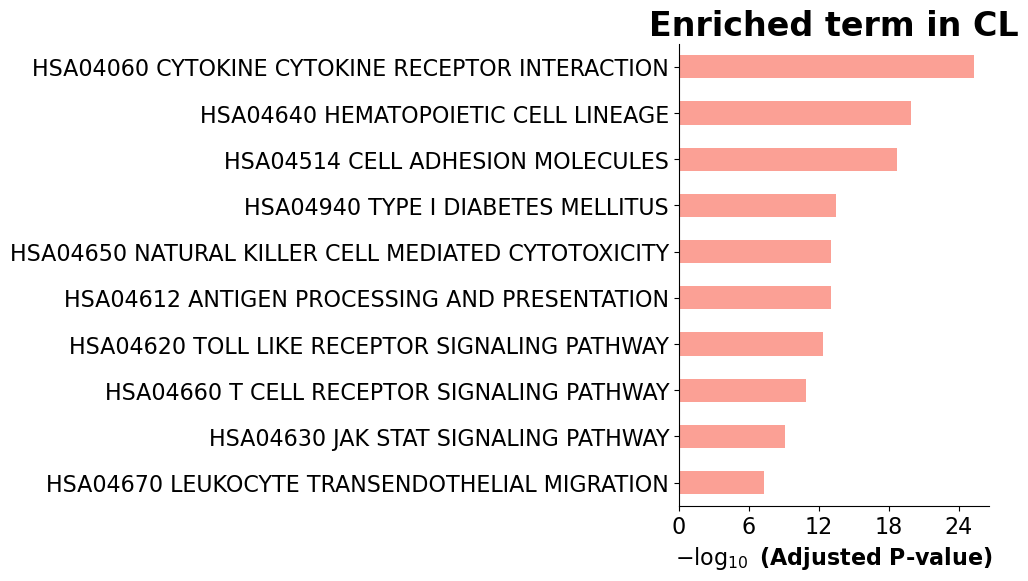

In [100]:
gp.plot.barplot(enr.res2d,title='Enriched term in CL')

<Axes: title={'center': 'Enriched term in CL'}, xlabel='Combined Score'>

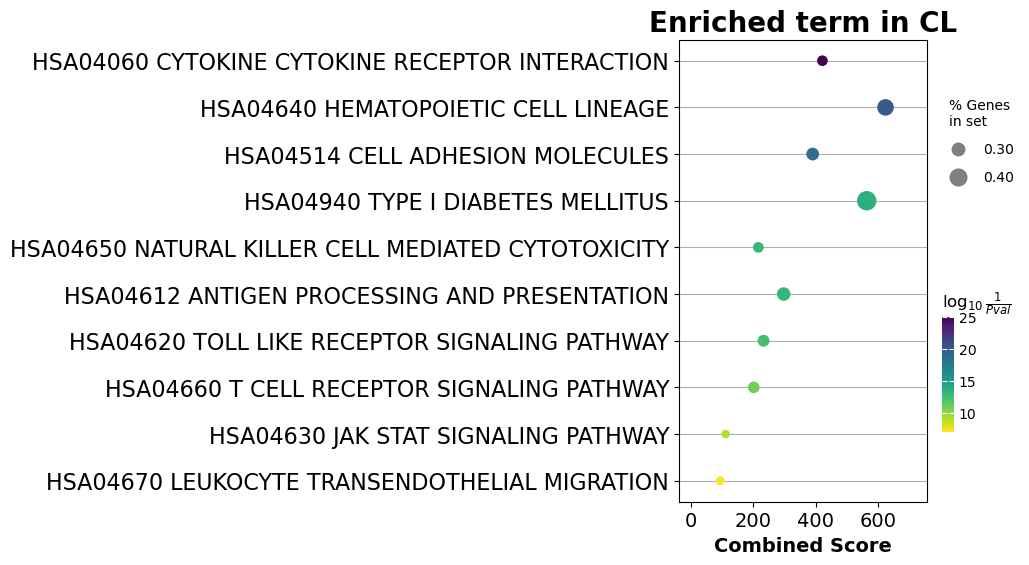

In [101]:
gp.plot.dotplot(enr.res2d,title='Enriched term in CL')

In [102]:
preranked = highexpr['log2FoldChange'].sort_values(ascending=False).reset_index()
preranked['index'] = preranked['index'].str.split('|').str.get(1)
preranked

,index,log2FoldChange
0,IGHG2,12.240424
1,IGHV3-30,11.552044
2,IGLV3-25,11.391853
3,IGLV2-18,10.917328
4,IGHA2,10.916107
...,...,...
12487,KRT85,-9.913455
12488,TRDN,-10.870391
12489,KRT32,-11.015033
12490,KRT71,-13.198076


In [103]:
pre_res = gp.prerank(preranked, gene_sets='KEGG_2016',
                    permutation_num=50,
                    outdir='test/prerank_report_kegg',
                     format='png', seed=42
                    )
pre_res.res2d.head()

2023-05-23 10:58:18,681 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-23 10:58:18,685 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Rheumatoid arthritis Homo sapiens hsa05323,0.78483,2.504259,0.0,0.0,0.0,41/71,9.15%,MMP1;MMP3;CCL3;IFNG;HLA-DRB5;IL6;CD80;CXCL1;CX...
1,prerank,Leishmaniasis Homo sapiens hsa05140,0.783273,2.449325,0.0,0.0,0.0,38/61,11.87%,IFNG;FCGR1A;HLA-DRB5;FCGR3A;IL1B;HLA-DRA;HLA-D...
2,prerank,Systemic lupus erythematosus Homo sapiens hsa0...,0.842334,2.408662,0.0,0.0,0.0,24/37,6.11%,IFNG;FCGR1A;HLA-DRB5;FCGR3A;CD80;HLA-DRA;HLA-D...
3,prerank,Graft-versus-host disease Homo sapiens hsa05332,0.880632,2.383979,0.0,0.0,0.0,26/28,9.54%,IFNG;HLA-DRB5;GZMB;IL6;HLA-E;CD80;KLRC1;FASLG;...
4,prerank,Type I diabetes mellitus Homo sapiens hsa04940,0.858029,2.36247,0.0,0.0,0.0,23/28,9.54%,IFNG;HLA-DRB5;GZMB;HLA-E;CD80;FASLG;PRF1;IL1B;...


In [104]:
pre_res.res2d.sort_values(by='NES',ascending=False).head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Rheumatoid arthritis Homo sapiens hsa05323,0.78483,2.504259,0.0,0.0,0.0,41/71,9.15%,MMP1;MMP3;CCL3;IFNG;HLA-DRB5;IL6;CD80;CXCL1;CX...
1,prerank,Leishmaniasis Homo sapiens hsa05140,0.783273,2.449325,0.0,0.0,0.0,38/61,11.87%,IFNG;FCGR1A;HLA-DRB5;FCGR3A;IL1B;HLA-DRA;HLA-D...
2,prerank,Systemic lupus erythematosus Homo sapiens hsa0...,0.842334,2.408662,0.0,0.0,0.0,24/37,6.11%,IFNG;FCGR1A;HLA-DRB5;FCGR3A;CD80;HLA-DRA;HLA-D...
3,prerank,Graft-versus-host disease Homo sapiens hsa05332,0.880632,2.383979,0.0,0.0,0.0,26/28,9.54%,IFNG;HLA-DRB5;GZMB;IL6;HLA-E;CD80;KLRC1;FASLG;...
4,prerank,Type I diabetes mellitus Homo sapiens hsa04940,0.858029,2.36247,0.0,0.0,0.0,23/28,9.54%,IFNG;HLA-DRB5;GZMB;HLA-E;CD80;FASLG;PRF1;IL1B;...


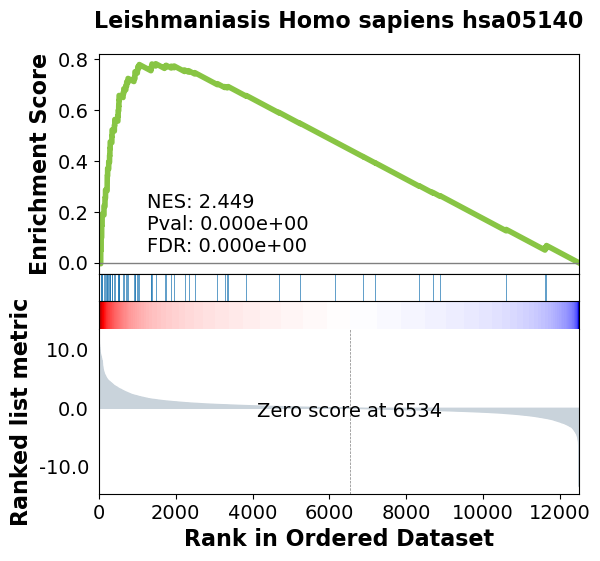

In [77]:
picked = 'Leishmaniasis Homo sapiens hsa05140'
gp.plot.gseaplot(rank_metric=pre_res.ranking,
                term=picked,
                **pre_res.results[picked])

In [105]:
exprdata = pd.read_csv('datasets/cutleish.tsv',sep='\t',index_col=0)
exprdata['genename'] = exprdata.index.to_series().str.split('|').str.get(1)
exprdata = exprdata.drop_duplicates(subset=['genename']).set_index('genename')

In [106]:
genesinterm = pre_res.res2d.set_index('Term').loc[picked]['Lead_genes'].split(';')
genesinterm

['IFNG',
 'FCGR1A',
 'HLA-DRB5',
 'FCGR3A',
 'IL1B',
 'HLA-DRA',
 'HLA-DRB1',
 'NCF1',
 'HLA-DMB',
 'TLR2',
 'FCGR2A',
 'ITGB2',
 'HLA-DQA1',
 'HLA-DQB1',
 'CYBA',
 'STAT1',
 'ITGA4',
 'HLA-DPA1',
 'NCF4',
 'HLA-DPB1',
 'HLA-DOA',
 'FCGR2C',
 'HLA-DMA',
 'ITGAM',
 'NCF2',
 'CR1',
 'TLR4',
 'FCGR3B',
 'PTGS2',
 'PRKCB',
 'IL1A',
 'PTPN6',
 'TGFB1',
 'TGFB3',
 'MARCKSL1',
 'IFNGR2',
 'NFKBIA',
 'MYD88']

<Axes: title={'center': 'Leishmaniasis Homo sapiens hsa05140'}>

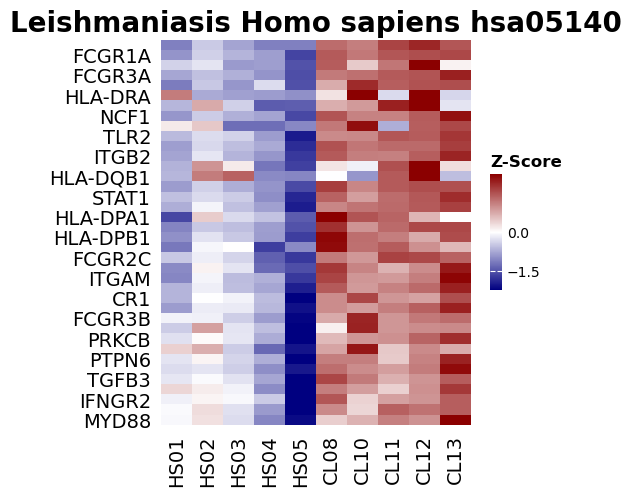

In [107]:
termexpr = np.log2(exprdata.reindex(genesinterm)+1)
gp.plot.heatmap(df=termexpr,z_score=0, title=picked)